In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import Image
from scipy.interpolate import interp2d
from scipy.misc import lena
from scipy.interpolate import RegularGridInterpolator

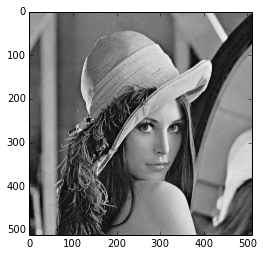

In [2]:
img = lena()
plt.imshow(img,cmap=cm.gray)
plt.show()

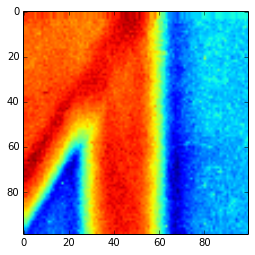

In [6]:
plt.imshow(img[1:100,:100])

In [53]:
imgLength = img.shape[0]
shift = 2
print("Length of image is",imgLength)
angle = np.random.uniform(2*np.pi)
#angle = np.pi/4
print("Angle of ",np.degrees(angle))
rotationMatrix = np.array([[np.cos(angle),-np.sin(angle),0],[np.sin(angle),np.cos(angle),0]])
print("Rotation matrix is")
print(rotationMatrix)
x,y = np.arange(-256,256,1),np.arange(-256,256,1)

('Length of image is', 512)
('Angle of ', 263.30251735921087)


In [55]:
interpolator = RegularGridInterpolator((x,y),img,bounds_error=False,fill_value=0)
ones = np.ones(imgLength**2)
coords = np.array([x,y,ones])

In [65]:
xx,yy = np.meshgrid(x,y)
xx = np.repeat(x,imgLength)
yy = np.tile(y,imgLength)
ones = np.ones(imgLength**2)
xxyy = np.vstack((xx,yy,ones))
newCoords = np.dot(xxyy.T,rotationMatrix.T)
newCoordsMesh = np.meshgrid(newCoords[0],newCoords[1])
xNew, yNew = newCoordsMesh
newImage = interpolator((newCoords[:,0],newCoords[:,1]))

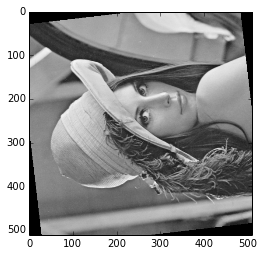

In [66]:
plt.imshow(newImage.reshape(512,512),cmap=cm.gray)
plt.show()